# Time Series Analysis: Tutorial 3

## Import packages

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('text', usetex=True)
import pandas as pd
import statsmodels.api as sm

## Data

In [28]:
# Load the csv-file for the GNP series into a dataframe. 
gnp=pd.read_csv('C:/Users/MS/Documents/TU/Teaching/TSA/B-Computations/real_US_GNP.csv', header=0, index_col=0, parse_dates=True)
# Generate a series which is the relative change of the original series.
gnp_relativechange=gnp.pct_change()

# The same for the Berlin data
berlin_housing=pd.read_csv('C:/Users/MS/Documents/TU/Teaching/TSA/B-Computations/berlin_rents.csv', header=0, index_col=0, parse_dates=True, sep = ";", decimal=',')
berlin_housing_relativechange=berlin_housing.pct_change()

# Inspect the data
print(gnp)
print(gnp_relativechange)
print(berlin_housing)
print(berlin_housing_relativechange)

               GNPC96
DATE                 
1947-01-01   2046.020
1947-04-01   2041.114
1947-07-01   2036.864
1947-10-01   2069.176
1948-01-01   2101.218
...               ...
2019-10-01  19509.573
2020-01-01  19232.070
2020-04-01  17442.931
2020-07-01  18788.590
2020-10-01  18984.499

[296 rows x 1 columns]
              GNPC96
DATE                
1947-01-01       NaN
1947-04-01 -0.002398
1947-07-01 -0.002082
1947-10-01  0.015864
1948-01-01  0.015485
...              ...
2019-10-01  0.005805
2020-01-01 -0.014224
2020-04-01 -0.093029
2020-07-01  0.077146
2020-10-01  0.010427

[296 rows x 1 columns]
            price
Date             
2012-02-15   6.95
2012-05-15   7.06
2012-08-15   7.17
2012-11-15   7.41
2013-02-15   7.56
2013-05-15   7.80
2013-08-15   7.90
2013-11-15   8.00
2014-02-15   8.00
2014-05-15   8.15
2014-08-15   8.20
2014-11-15   8.37
2015-02-15   8.50
2015-05-15   8.45
2015-08-15   8.27
2015-11-15   8.50
2016-02-15   8.59
2016-05-15   8.89
2016-08-15   9.00
2016-11-15   9.

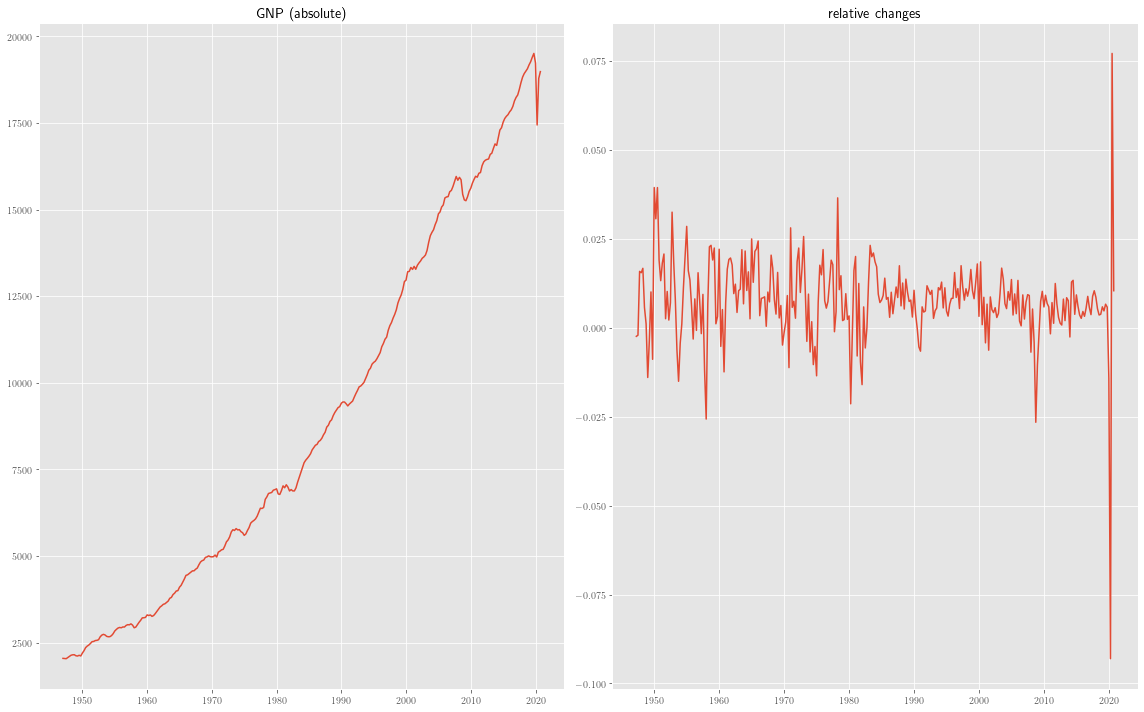

In [14]:
# Plot the GNP series with matplotlib, together with the relative change. 
# Which series is stationary and which is not?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
axes[0].plot(gnp)
axes[0].set_title('GNP (absolute)')
axes[1].plot(gnp_relativechange)
axes[1].set_title('relative changes')
fig.tight_layout()


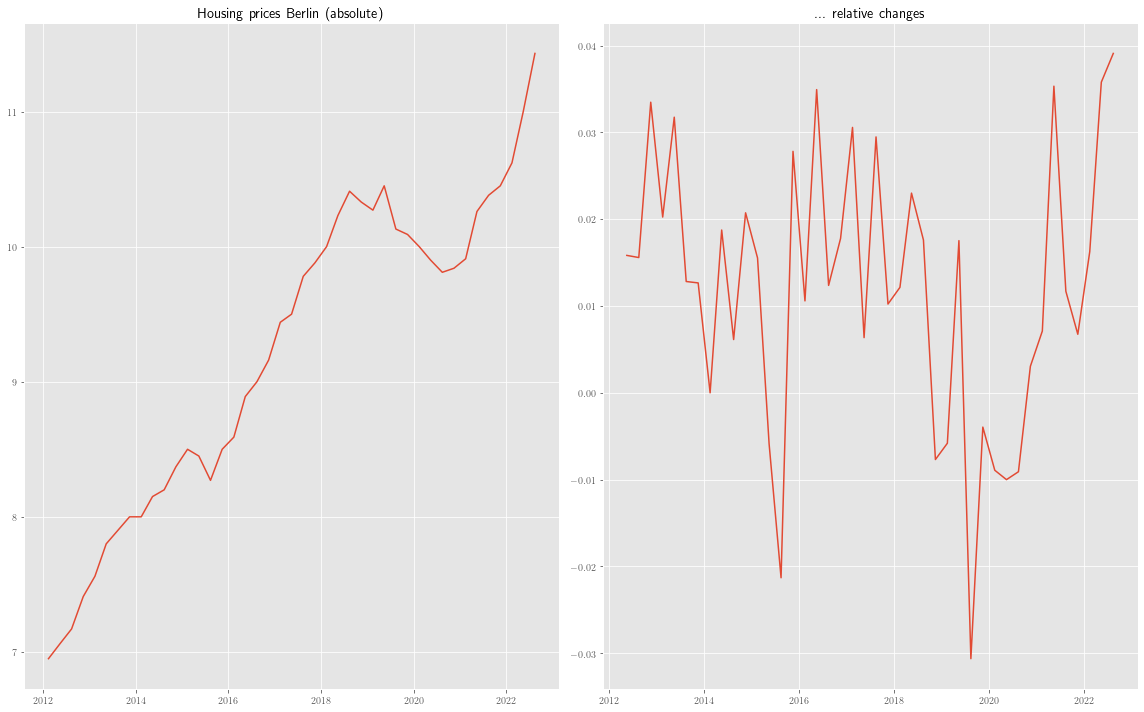

In [15]:
# Now the same but for the housing prices (rents) in Berlin
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
axes[0].plot(berlin_housing)
axes[0].set_title('Housing prices Berlin (absolute)')
axes[1].plot(berlin_housing_relativechange)
axes[1].set_title('... relative changes')
fig.tight_layout()

## Autocorrelation

Let us visualize serial correlation in the data $Y_t=\{y_1,y_2,\ldots,y_T\}$ by generating pairs $(y_t,y_{t-j})$ for all $j\in\{1,\ldots,J\}$ and then plot the corresponding scatterplots. Here, we just use the existing data $y_t=[y_1,y_2,\ldots,y_n]$ and generate two series $y_{t+j}=[y_{1+j},\ldots,y_n]$ and $y_t^*=[y_1,y_2,\ldots,y_{n-j}]$ for the lags $k\in\mathbb{N}$ and plot these series for different values of $j$ (e.g. $j=1,2,\ldots,6$) against each other.

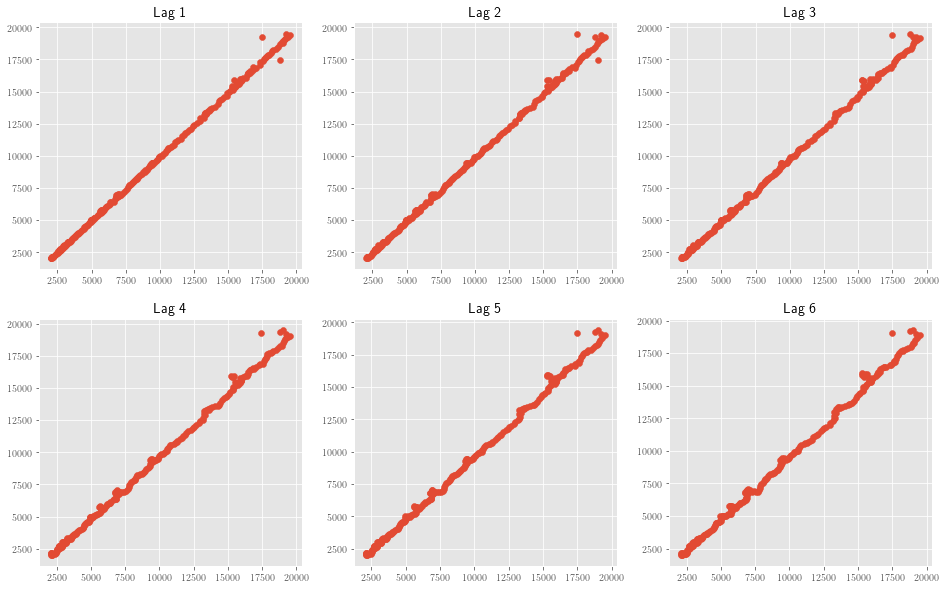

In [16]:
# Plot the autocorrelation for lags k = 1,2,3, ...

# ... for the GNP series (absolute values)
fig, axs=plt.subplots(2,3,figsize=(16,10))
for i in range(6):
    axs[i//3,i%3].set_title('Lag '+str(i+1))
    axs[i//3,i%3].scatter(gnp[(i+1):],gnp[:-(i+1)])


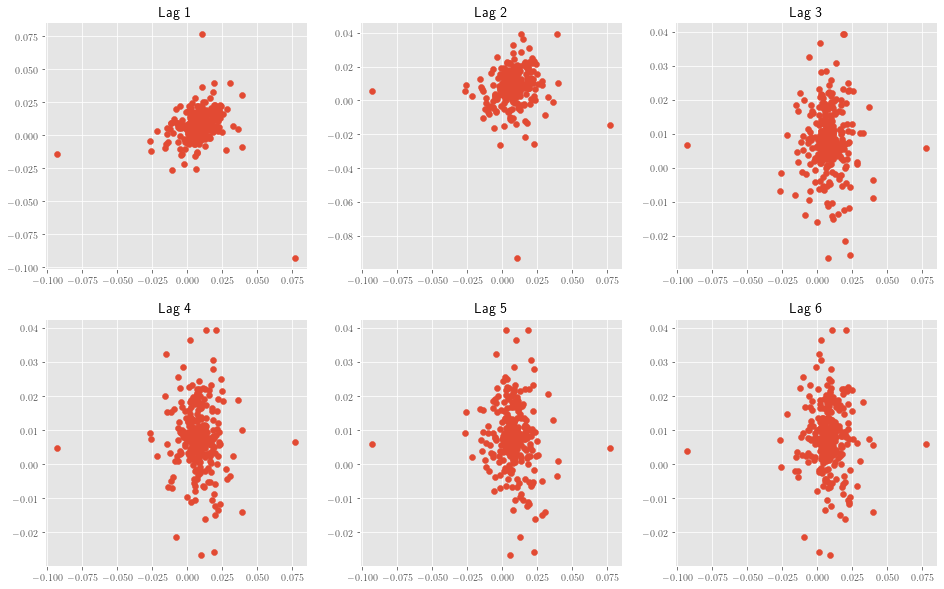

In [17]:
# ... for the GNP series (relative changes)
fig, axs=plt.subplots(2,3,figsize=(16,10))
for i in range(6):
    axs[i//3,i%3].set_title('Lag '+str(i+1))
    axs[i//3,i%3].scatter(gnp_relativechange[(i+1):],gnp_relativechange[:-(i+1)])


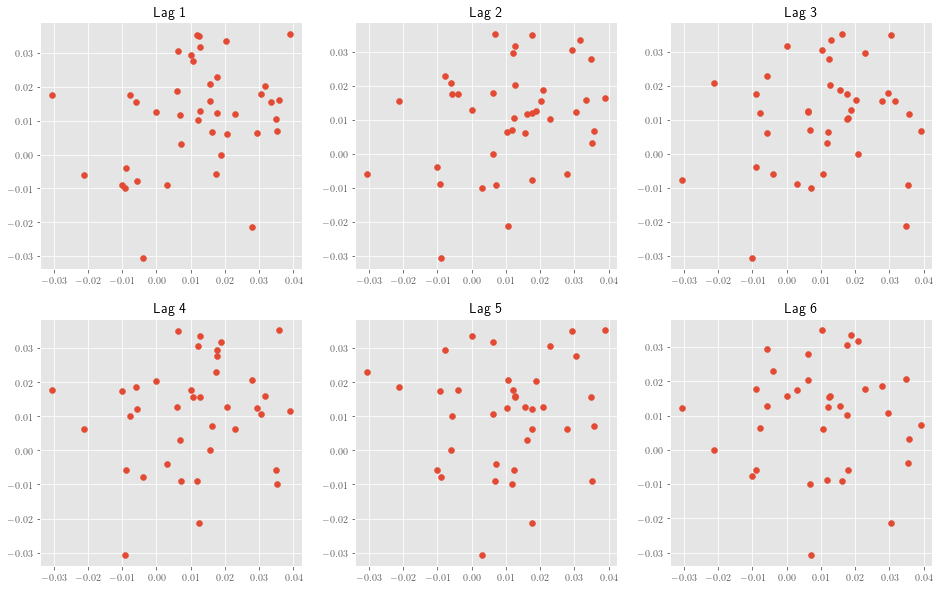

In [18]:
# ... for the Housing price series
fig, axs=plt.subplots(2,3,figsize=(16,10))
for i in range(6):
    axs[i//3,i%3].set_title('Lag '+str(i+1))
    axs[i//3,i%3].scatter(berlin_housing_relativechange[(i+1):],berlin_housing_relativechange[:-(i+1)])


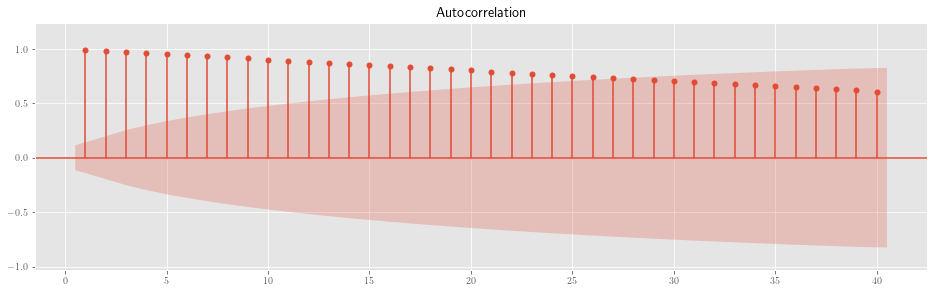

In [19]:
#Plot the ACF for the original GNP data.
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gnp.values[1:].squeeze(), lags=40, ax=ax1, zero=False, auto_ylims=True)


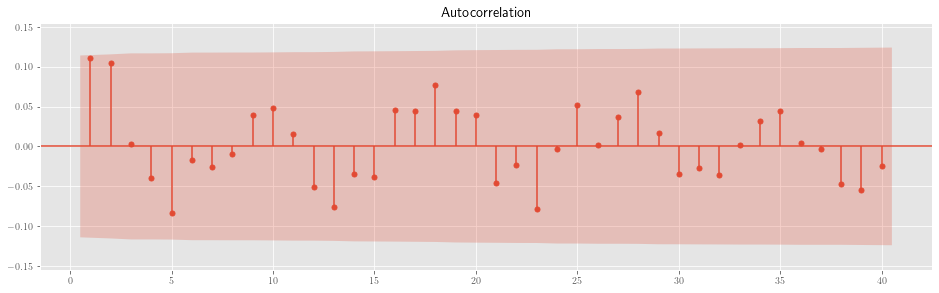

In [20]:
# Plot the ACF for the stationary GNP data.
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gnp_relativechange.values[1:].squeeze(), lags=40, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)


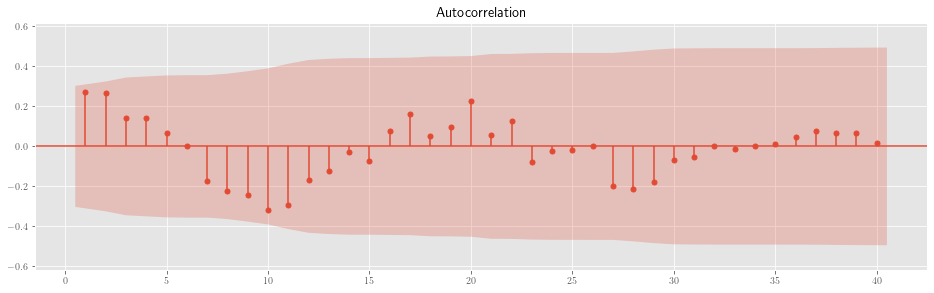

In [21]:
# Plot the ACF for the 'stationary' Housing data.
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(berlin_housing_relativechange.values[1:].squeeze(), lags=40, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)
